<a href="https://colab.research.google.com/github/sateeshbij/dataanalysis/blob/master/Uber_Supply_Demand_Gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [0]:
uber = pd.read_csv("Uber Request Data.csv")

In [0]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [0]:
uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [0]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [0]:
uber['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [0]:
uber['Request timestamp'] =pd.to_datetime(uber['Request timestamp'],dayfirst=True)

In [0]:
uber['Req-Date'] = uber['Request timestamp'].dt.date

In [0]:
uber['Req-Time']= uber['Request timestamp'].dt.time

In [0]:
uber['Req-Hour']= uber['Request timestamp'].dt.hour

In [0]:
#LN- LateNight,EM- EarlyMorning, M- Morning,OH- OfficeHours,N-Noon,MN-Midnoon,E-Evening,LE-LateEvening
uber['TimeSlots'] =pd.cut(uber['Req-Hour'],[0,3,6,9,12,15,18,21,24],labels=['LN','EM','M','OH','N','MN','E','LE'],right=False)

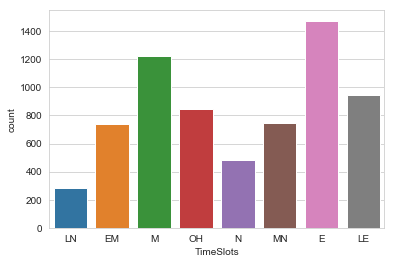

In [0]:
sns.countplot(uber['TimeSlots'])

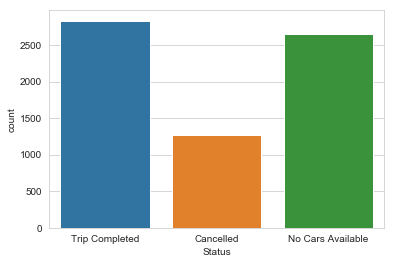

In [0]:
sns.countplot(uber['Status'])

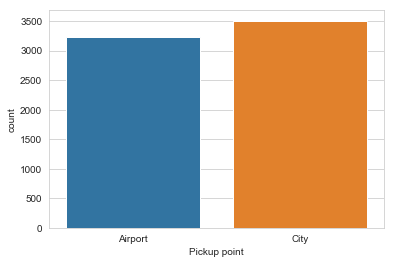

In [0]:
sns.countplot(uber['Pickup point'])

In [0]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null object
Req-Date             6745 non-null object
Req-Time             6745 non-null object
Req-Hour             6745 non-null int64
TimeSlots            6745 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 481.3+ KB


In [0]:
# Removing Completed trips as cancelled status and No cars Available is the problem with uber
uber_prob = uber[uber['Status'] != 'Trip Completed']

In [0]:
uber_prob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3914 entries, 2831 to 6744
Data columns (total 10 columns):
Request id           3914 non-null int64
Pickup point         3914 non-null object
Driver id            1264 non-null float64
Status               3914 non-null object
Request timestamp    3914 non-null datetime64[ns]
Drop timestamp       0 non-null object
Req-Date             3914 non-null object
Req-Time             3914 non-null object
Req-Hour             3914 non-null int64
TimeSlots            3914 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 310.0+ KB


In [0]:
#dropping column drop timestamp as it has zero values
uber_prob.drop(columns='Drop timestamp',inplace=True)

C:\Users\sateesh\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
uber_prob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3914 entries, 2831 to 6744
Data columns (total 9 columns):
Request id           3914 non-null int64
Pickup point         3914 non-null object
Driver id            1264 non-null float64
Status               3914 non-null object
Request timestamp    3914 non-null datetime64[ns]
Req-Date             3914 non-null object
Req-Time             3914 non-null object
Req-Hour             3914 non-null int64
TimeSlots            3914 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 279.4+ KB


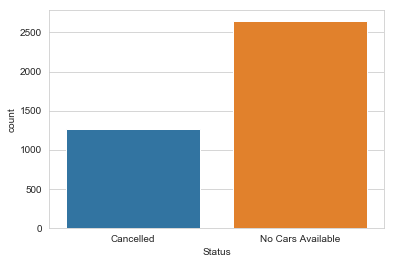

In [0]:
# plot to visualise the frequency of requests that get cancelled or 'no cars available'
sns.countplot(uber_prob['Status'])

In [0]:
pp_s = pd.pivot_table(uber_prob,values='Req-Hour',index='Status',columns="Pickup point",aggfunc="count")
pp_s

Pickup point,Airport,City
Status,,
Cancelled,198,1066
No Cars Available,1713,937


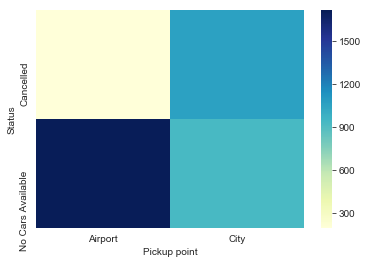

In [0]:
sns.heatmap(pp_s,cmap="YlGnBu")

In [0]:
pp_t = pd.pivot_table(uber_prob,values='Req-Hour',index='TimeSlots',columns=["Pickup point","Status"],aggfunc="count")
pp_t

Pickup point   Airport                        City                  
Status       Cancelled No Cars Available Cancelled No Cars Available
TimeSlots                                                           
LN                 NaN              84.0      12.0              85.0
EM                 6.0              67.0     223.0             147.0
M                 11.0              11.0     481.0             228.0
OH                22.0              30.0     230.0             159.0
N                 25.0              42.0      23.0              92.0
MN                44.0             237.0      34.0              89.0
E                 59.0             852.0      30.0              43.0
LE                31.0             390.0      33.0              94.0

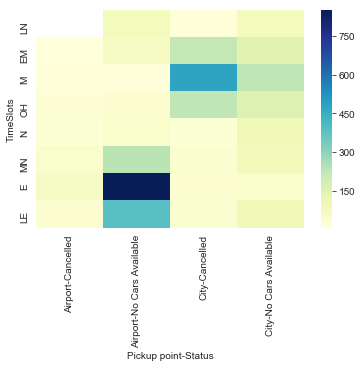

In [0]:
# The problematic types of requests are 
# 1 airport to city in Evening,LateEvening and MidNight because of No Cars available
# 2 city to airport in OfficeHours,Morning and EarlyMorning because of cancelled trips
# The most problematic issue is a trip from Airport to city in the evening because of No Cars Available.
sns.heatmap(pp_t,cmap="YlGnBu")

In [0]:
pp_t = pd.pivot_table(uber,values='Req-Hour',index='TimeSlots',columns=["Pickup point","Status"],aggfunc="count")
pp_t

Pickup point   Airport                                       City  \
Status       Cancelled No Cars Available Trip Completed Cancelled   
TimeSlots                                                           
LN                 NaN              84.0           52.0      12.0   
EM                 6.0              67.0          136.0     223.0   
M                 11.0              11.0          223.0     481.0   
OH                22.0              30.0          176.0     230.0   
N                 25.0              42.0          135.0      23.0   
MN                44.0             237.0          164.0      34.0   
E                 59.0             852.0          238.0      30.0   
LE                31.0             390.0          203.0      33.0   

Pickup point                                   
Status       No Cars Available Trip Completed  
TimeSlots                                      
LN                        85.0           50.0  
EM                       147.0          161.0  
M                        228.0          273.0  
OH                       159.0          228.0  
N                         92.0          163.0  
MN                        89.0          180.0  
E                         43.0          253.0  
LE                        94.0          196.0

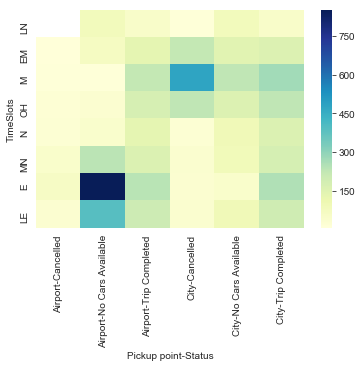

In [0]:
sns.heatmap(pp_t,cmap="YlGnBu")

In [0]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null object
Req-Date             6745 non-null object
Req-Time             6745 non-null object
Req-Hour             6745 non-null int64
TimeSlots            6745 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 481.3+ KB


In [0]:
# Request id's are not duplicated 
print(any(uber['Request id'].duplicated()))

False


In [0]:
#There are no duplicate rows
uber[uber.duplicated()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req-Date,Req-Time,Req-Hour,TimeSlots


In [0]:
pp_reqid = pd.pivot_table(uber,values='Request id',index='TimeSlots',columns=["Pickup point","Status"],aggfunc="count")
pp_reqid

Pickup point   Airport                                       City  \
Status       Cancelled No Cars Available Trip Completed Cancelled   
TimeSlots                                                           
LN                 NaN              84.0           52.0      12.0   
EM                 6.0              67.0          136.0     223.0   
M                 11.0              11.0          223.0     481.0   
OH                22.0              30.0          176.0     230.0   
N                 25.0              42.0          135.0      23.0   
MN                44.0             237.0          164.0      34.0   
E                 59.0             852.0          238.0      30.0   
LE                31.0             390.0          203.0      33.0   

Pickup point                                   
Status       No Cars Available Trip Completed  
TimeSlots                                      
LN                        85.0           50.0  
EM                       147.0          161.0  
M                        228.0          273.0  
OH                       159.0          228.0  
N                         92.0          163.0  
MN                        89.0          180.0  
E                         43.0          253.0  
LE                        94.0          196.0

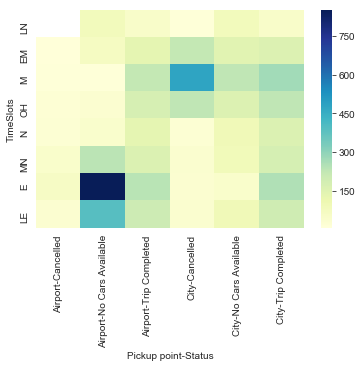

In [0]:
sns.heatmap(pp_reqid,cmap="YlGnBu")